## Staging field for experimenting with dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from datetime import datetime, date 

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200) #total row able to be displayed in jupyter notebook
sns.set_style("whitegrid")

In [32]:
df = pd.read_csv("Aquifer_Petrignano.csv")

# Drop data before 2009 for the purpose of this tutorial
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Drop one of the target columns, so we can focus on only one target
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

# Simplify column names
df.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']
targets = ['Depth_to_Groundwater']
features = [feature for feature in df.columns if feature not in targets]
df['Date'] = pd.to_datetime(df.Date, format = '%d/%m/%Y') #convert date to datetime format
df.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


### Staging Area

(17897.0, 18262.0)

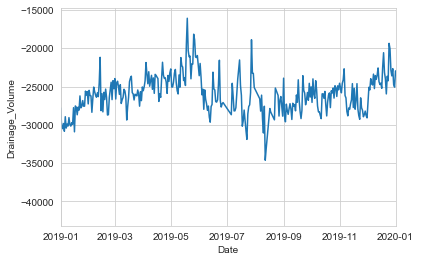

In [61]:
old = df.copy()
g = sns.lineplot(
    data = df,
    x ='Date',
    y = 'Drainage_Volume'
)
g.set_xlim([date(2019, 1, 1), date(2020, 1, 1)])

In [56]:
# Converting 0 values to null
df.Drainage_Volume = np.where(df.Drainage_Volume == 0, np.nan, df.Drainage_Volume)
df.River_Hydrometry = df.River_Hydrometry.mask(df.River_Hydrometry == 0, np.nan)

In [62]:
df.isna().value_counts()

Date   Rainfall  Depth_to_Groundwater  Temperature  Drainage_Volume  River_Hydrometry
False  False     False                 False        False            False               3996
                                                                     True                 150
                 True                  False        False            False                 27
                 False                 False        True             False                 26
dtype: int64

In [90]:
nan_values = old[old.Drainage_Volume.isna()].index.to_list()
old.iloc[nan_values, :]

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
889,2011-06-09,0.2,-23.24,19.2,NaN,2.0
890,2011-06-10,0.0,-23.28,19.1,NaN,2.0
1083,2011-12-20,0.0,-27.11,1.9,NaN,2.0
3830,2019-06-28,0.0,-25.55,29.7,NaN,2.4
3831,2019-06-29,0.0,-25.66,27.8,NaN,2.4
3832,2019-06-30,0.0,-25.71,27.1,NaN,2.4
3833,2019-07-01,0.0,-25.73,28.7,NaN,2.4
3834,2019-07-02,0.0,-25.74,29.3,NaN,2.4
3835,2019-07-03,0.0,-25.82,29.8,NaN,2.4
3836,2019-07-04,0.0,-26.00,29.0,NaN,2.3


In [86]:
df['Drainage_Volume'] = df['Drainage_Volume'].interpolate()
df['River_Hydrometry'] = df['River_Hydrometry'].interpolate()
df['Depth_to_Groundwater'] = df['Depth_to_Groundwater'].interpolate()

In [91]:
df.iloc[nan_values, :]

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
889,2011-06-09,0.2,-23.24,19.2,-27739.008,2.0
890,2011-06-10,0.0,-23.28,19.1,-29064.672,2.0
1083,2011-12-20,0.0,-27.11,1.9,-35922.960,2.0
3830,2019-06-28,0.0,-25.55,29.7,-27252.672,2.4
3831,2019-06-29,0.0,-25.66,27.8,-27429.312,2.4
3832,2019-06-30,0.0,-25.71,27.1,-27605.952,2.4
3833,2019-07-01,0.0,-25.73,28.7,-27782.592,2.4
3834,2019-07-02,0.0,-25.74,29.3,-27959.232,2.4
3835,2019-07-03,0.0,-25.82,29.8,-28135.872,2.4
3836,2019-07-04,0.0,-26.00,29.0,-28312.512,2.3


<AxesSubplot:xlabel='Date', ylabel='River_Hydrometry'>

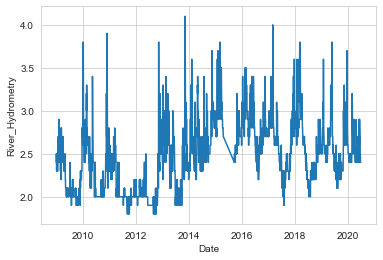

In [89]:
sns.lineplot(data= df, x='Date', y = 'River_Hydrometry')

(18017.0, 18170.0)

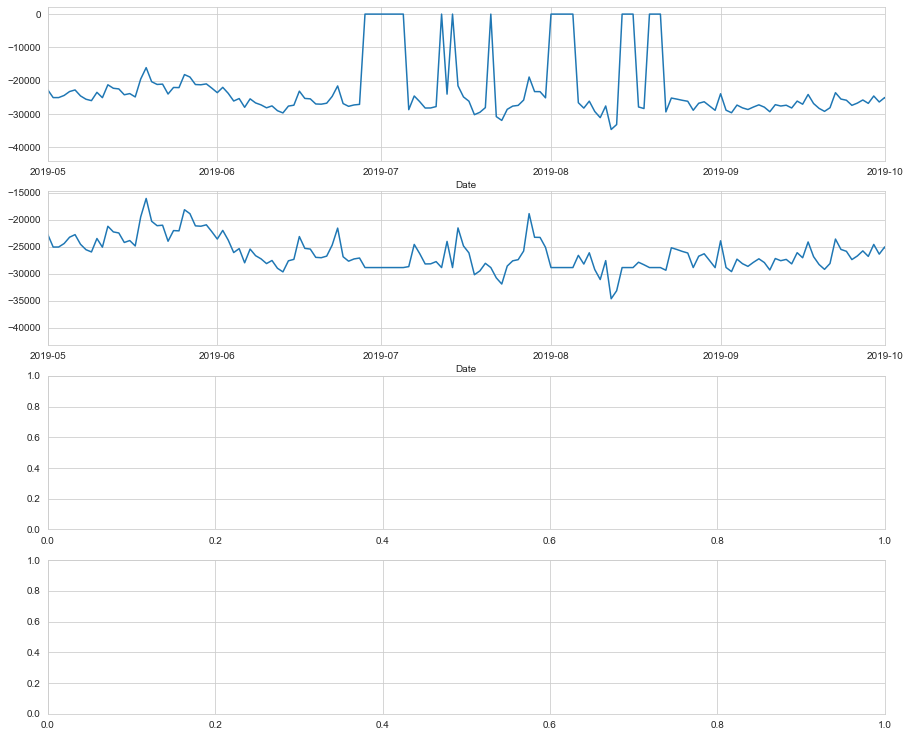

In [78]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 13))
sns.lineplot(
    data = df,
    x = df.Date,
    y = np.where(df.Drainage_Volume.isna(), 0, df.Drainage_Volume),
    ax = ax[0]
)

sns.lineplot(
    data = df,
    x = df.Date,
    y = np.where(df.Drainage_Volume.isna(), df.Drainage_Volume.mean(), df.Drainage_Volume),
    ax = ax[1]
)


ax[0].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
ax[1].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])

In [5]:
df.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


In [10]:
df.shape

(4199, 6)

In [26]:
df.columns

Index(['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature',
       'Drainage_Volume', 'River_Hydrometry'],
      dtype='object')

In [42]:
df.resample('M', on='Date').mean()

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
Date,,,,,
2009-01-31,0.203226,-30.503871,4.964516,-26695.119484,2.387097
2009-02-28,0.500000,-29.350000,5.125000,-25641.174857,2.546429
2009-03-31,1.103226,-28.502903,9.254839,-28374.874839,2.490323
2009-04-30,0.543333,-27.736333,13.806667,-28167.667200,2.403333
2009-05-31,0.922581,-27.478065,19.809677,-32187.288774,2.109677
2009-06-30,0.010000,-27.522000,21.203333,-31514.832000,2.053333
2009-07-31,0.058065,-27.721613,25.393548,-32104.790710,2.058065
2009-08-31,1.522581,-28.175806,25.780645,-31489.901419,2.041935
2009-09-30,0.453333,-28.435000,21.060000,-33777.964800,2.000000


Text(0.5, 1.0, 'Weekly Rainfall (Acc.)')

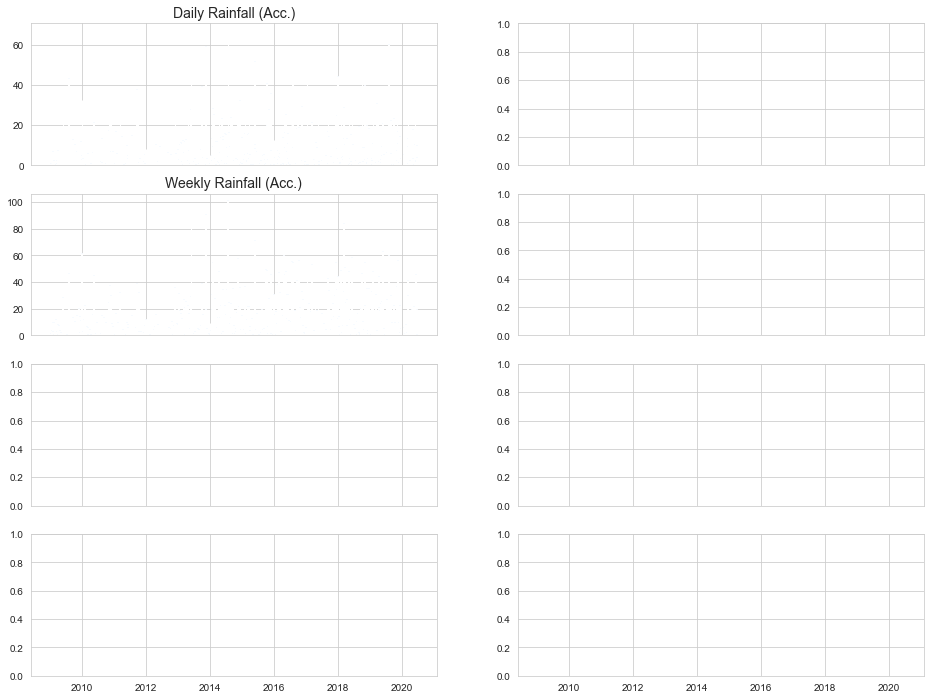

In [84]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,12))

ax[0, 0].bar(df.Date, df.Rainfall, width=5, color='dodgerblue')
ax[0, 0].set_title('Daily Rainfall (Acc.)', fontsize=14)

resampled_df = df[['Date','Rainfall']].resample('7D', on='Date').sum().reset_index(drop=False)
ax[1, 0].bar(resampled_df.Date, resampled_df.Rainfall, width=10, color='dodgerblue')
ax[1, 0].set_title('Weekly Rainfall (Acc.)', fontsize=14)
plt.show()

In [92]:
type(df.resample('W', on='Date').sum().take)

method

In [86]:
df_downsampled = df[['Date',
                     'Depth_to_Groundwater', 
                     'Temperature',
                     'Drainage_Volume', 
                     'River_Hydrometry'
                    ]].resample('7D', on='Date').mean().reset_index(drop=False)

df_downsampled['Rainfall'] = df[['Date',
                                 'Rainfall'
                                ]].resample('7D', on='Date').sum().reset_index(drop=False)[['Rainfall']]

df_downsampled

,Date,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry,Rainfall
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.0
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,2.0
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.2
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,4.1
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,9.9
...,...,...,...,...,...,...
595,2020-05-28,-24.697143,17.214286,-25591.062857,2.414286,24.6
596,2020-06-04,-24.638571,18.785714,-24567.099429,2.628571,46.2
597,2020-06-11,-24.751429,19.200000,-27192.528000,2.771429,20.0
598,2020-06-18,-24.822857,21.942857,-28030.134857,2.600000,1.4


In [105]:
a = [3, 4, 5,5,4,5,6,8,3,4,5,3,6,4,3,5,3,5, 5]
print('The standard deviation is: ', np.std(a))
print('The variance is: ', np.var(a))

The standard deviation is:  1.2718995761678495
The variance is:  1.6177285318559556


In [108]:
 np.std(a) *  np.std(a)

1.6177285318559553

In [102]:
np.var(a) / np.std(a)

1.2718995761678498

In [103]:
np.std(a) / np.var(a)

0.7862255941722496